# Spline interpolacion
  

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import solve
import sympy as sp
%matplotlib inline
#REF: Adaptado de  https://github.com/rrgalvan

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$.

In [ ]:
x0, x1, x2 = -1, 0, 1
_x = np.array([x0, x1, x2])
y0, y1, y2 =  5, 3, 3
_y = np.array([y0, y1, y2])

Para calcular los splines cúbicos debemos resolver el sistema de ecuaciones que define los coeficientes de los polinomios cúbicos en los subintervalos $[-1,0]$ y $[0,1]$. Empleando las condiciones del metodo de spline, y defiendo los polinomios para garantizar la continuidad en cada unos de los puntos, tenemos que:

Sean:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3$,
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3$,

es decir:
  * $s_0(x) = a_0 + b_0 (x+1) + c_0 (x+1)^2 + d_0 (x+1)^3$,
  * $s_1(x) = a_1 + b_1 x + c_1 x^2 + d_1 x^3$.

Entonces
  * $s_0'(x) =  b_0 + 2 c_0 (x+1) + 3 d_0 (x+1)^2$,
  * $s_0''(x) = 2 c_0 + 6 d_0 (x+1)$,
  * $s_1'(x) =  b_1 + 2 c_1 x + 3 d_1 x^2$,
  * $s_1''(x) = 2 c_1 + 6 d_1 x$.

Tenemos 8 incógnitas, $a_i$, $b_i$, $c_i$, $d_i$ con $i=0,1$. Las ecuaciones son:

  * Interpolación (y continuidad en 0):

    * $s_0(-1) = 5$, es decir, $a_0=5$.
    * $s_0(0)  = 3$, es decir, $a_0+b_0+c_0+d_0=3$.
    * $s_1(0) = 3$, es decir, $a_1=3$.
    * $s_1(1)  = 3$, es decir, $a_1+b_1+c_1+d_1=3$.
    
  * Derivabilidad:

    * $s_0'(0) = s_1'(-1)$, es decir, $b_0+2c_0+3d_0 = b_1$.
    * $s_0''(0) = s_1''(-1)$, es decir, $2c_0+6d_0 = 2c_1$.

  * Condiciones naturales en los extremos, $-1$ y $1$:

    * $s_0''(-1) = 0$, es decir, $2c_0=0$.
    * $s_1''(1) = 0$, o sea $2c_1+6d_1=0$.


De estas ecuaciones tenemos directamente $a_0$, $a_1$, y $c_1$. Le damos valores a las variables en python:

In [ ]:
a0 = 5
a1 = 3
c0 = 0

Así, podemos eliminar la primera, tercera y séptima ecuación, llegando a un sistema de cinco ecuaciones con cinco incógnitas ($b_0$, $d_0$, $b_1$, $c_1$, $d_1$):

 * $b_0+d_0=3-a_0-c_0=-2$,
 * $b_1+c_1+d_1=3-a_1=0$,
 * $b_0+3d_0 - b_1 = -2c_0 = 0$,
 * $6d_0 - 2c_1 = -2c_0=0$
 * $2c_1+6d_1=0$


La matriz y el segundo miembro asociados son:

In [ ]:
A = np.array([
	[ 1, 1,   0,  0, 0],
	[ 0, 0,   1,  1, 1],
	[ 1, 3,  -1,  0, 0],
	[ 0, 6,   0, -2, 0],
	[ 0, 0,   0,  2, 6]])
b = np.array([-2, 0, 0, 0, 0])

In [ ]:
sol = solve(A,b)
print(sol)

[-2.5  0.5 -1.   1.5 -0.5]


Ahora podemos resolver este sistema usando la función `solve()` (incluida en el modulo "linalg" del paquete *numpy*):

In [ ]:
sol = solve(A,b)

# Definimos la solución como variables b0, d0, b1, c1 y d1
b0, d0, b1, c1, d1 = sol

# Y mostramos los resultados
print ("a0, b0, c0, d0 = %f, %f, %f, %f" % (a0, b0, c0, d0))
print ("a1, b1, c1, d1 = %f, %f, %f, %f" % (a1, b1, c1, d1))

a0, b0, c0, d0 = 5.000000, -2.500000, 0.000000, 0.500000
a1, b1, c1, d1 = 3.000000, -1.000000, 1.500000, -0.500000


Para dibujar la gráfica, lo más fácil es definir los polinomios $s_0$ y $s_1$ y representarlos gráficamente.

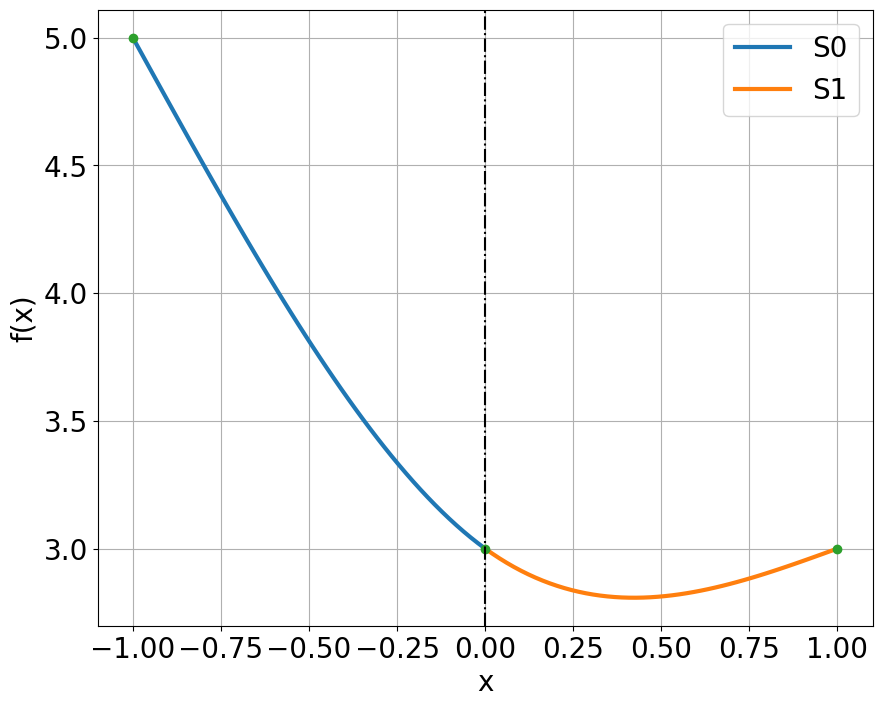

In [ ]:
def s0(x):
    return a0 + b0*(x+1) + c0*(x+1)**2 + d0*(x+1)**3
def s1(x):
    return a1 + b1*x + c1*x**2 + d1*x**3

xx0 = np.linspace(-1,0)
xx1 = np.linspace(0,1)

plt.figure(figsize=(10, 8))
plt.plot(xx0, s0(xx0), lw=3, label = "S0")
plt.plot(xx1, s1(xx1), lw=3, label = "S1")
plt.plot(_x, _y, 'o')
plt.axvline(color = "k", ls="-.")
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "upper right", fontsize= 20)
plt.grid()
plt.show()

Código: agregando un nuevo punto

$(-1,5)$, $(0,3)$, $(1,3)$,$(2,7)$

In [ ]:
x0, x1, x2, x3= -1, 0, 1, 2
_x = np.array([x0, x1, x2, x3])
y0, y1, y2, y3 =  5, 3, 3, 7
_y = np.array([y0, y1, y2, y3])

Sean:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3$,
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3$,
  * $s_2(x) = a_2 + b_2 (x-x_2) + c_2 (x-x_2)^2 + d_1 (x-x_2)^3$,

  es decir:
  * $s_0(x) = a_0 + b_0 (x+1) + c_0 (x+1)^2 + d_0 (x+1)^3$,
  * $s_1(x) = a_1 + b_1 x + c_1 x^2 + d_1 x^3 $.
  * $s_2(x) = a_2 + b_2 (x-1) + c_2 (x-1)^2 + d_2 (x-1)^3$.

In [ ]:
#constantes
x=sp.Symbol("x")
a_0=sp.Symbol("a_0")
b_0=sp.Symbol("b_0")
c_0=sp.Symbol("c_0")
d_0=sp.Symbol("d_0")
x

x

In [ ]:
#Primera derivada de s0(x)
s0= lambda x_: a_0 + b_0 * (x_+1) + c_0 * (x_+1)**2 + d_0 *(x_+1)**3
sp.diff(s0(x),x)

b_0 + c_0*(2*x + 2) + 3*d_0*(x + 1)**2

In [ ]:
#segunda derivada de s0(x)
s02= lambda x_: b_0 + c_0*(2*x_+2) + 3*d_0*(x_+1)**2
sp.diff(s02(x),x)

2*c_0 + 3*d_0*(2*x + 2)

In [ ]:
#constantes
x=sp.Symbol("x")
a_1=sp.Symbol("a_1")
b_1=sp.Symbol("b_1")
c_1=sp.Symbol("c_1")
d_1=sp.Symbol("d_1")

In [ ]:
#primera derivada de s1(x)
s1= lambda x_: a_1 + b_1*x_ + c_1 * x_**2 + d_1 * x_**3
sp.diff(s1(x),x)

b_1 + 2*c_1*x + 3*d_1*x**2

In [ ]:
#segunda derivada s1(x)
s12= lambda x_: b_1 + 2*c_1*x + 3*d_1*x**2
sp.diff(s12(x),x)

2*c_1 + 6*d_1*x

In [ ]:
#constantes
x=sp.Symbol("x")
a_2=sp.Symbol("a_2")
b_2=sp.Symbol("b_2")
c_2=sp.Symbol("c_2")
d_2=sp.Symbol("d_2")

In [ ]:
#primera derivada s2(x)
s2= lambda x_:a_2 + b_2 * (x-1) + c_2 * (x-1)**2 + d_2 * (x-1)**3
sp.diff(s2(x),x)

b_2 + c_2*(2*x - 2) + 3*d_2*(x - 1)**2

In [ ]:
#segunda derivada s2(x)
s22= lambda x_:b_2 + c_2*(2*x-2) + 3*d_2*(x-1)**2
sp.diff(s22(x),x)

2*c_2 + 3*d_2*(2*x - 2)

De acuerdo a lo anterior tenemos que:

$s_0'= b_0 + c_0(2x + 2) + 3d_0(x + 1)^2$

$s_0''= 2c_0 + 3d_0(2x + 2)$

$s_1'=b_1 + 2c_1x + 3d_1x^2$

$s_1''=2c_1 + 6d_1x$

$s_2'=b_2 + c_2(2x - 2) + 3d_2(x - 1)^2$

$s_2''=2c_2 + 3d_2(2x - 2)$

Expresando las ecuaciones

In [ ]:
s0= lambda x_: a_0 + b_0 * (x_+1) + c_0 * (x_+1)**2 + d_0 *(x_+1)**3
print(s0(-1),"=",y0)

s0= lambda x_: a_0 + b_0 * (x_+1) + c_0 * (x_+1)**2 + d_0 *(x_+1)**3
print(s0(0),"=",y1)

s1= lambda x_: a_1 + b_1*x_ + c_1 * x_**2 + d_1 * x_**3
print(s1(0),"=",y1)

s1= lambda x_: a_1 + b_1*x_ + c_1 * x_**2 + d_1 * x_**3
print(s1(1),"=",y2)

s2= lambda x_:a_2 + b_2 * (x_-1) + c_2 * (x_-1)**2 + d_2 * (x_-1)**3
print(s2(1),"=",y2)

s2= lambda x_:a_2 + b_2 * (x_-1) + c_2 * (x_-1)**2 + d_2 * (x_-1)**3
print(s2(2),"=",y3)

a_0 = 5
a_0 + b_0 + c_0 + d_0 = 3
a_1 = 3
a_1 + b_1 + c_1 + d_1 = 3
a_2 = 3
a_2 + b_2 + c_2 + d_2 = 7


In [ ]:
#Derivabilidad
s_0_1dev= lambda x_: b_0 + c_0*(2*x_ + 2) + 3*d_0*(x_ + 1)**2
s_1_1dev= lambda x_: b_1 + 2*c_1*x_ + 3*d_1*x_**2
s_2_1dev= lambda x_: b_2 + c_2*(2*x_ - 2) + 3*d_2*(x_ - 1)**2

s_0_2dev= lambda x_:2*c_0 + 3*d_0*(2*x_ + 2)
s_1_2dev= lambda x_:2*c_1 + 6*d_1*x_
s_2_2dev= lambda x_:2*c_2 + 3*d_2*(2*x_ - 2)

print(s_0_1dev(0),"=",s_1_1dev(0))
print(s_1_1dev(1),"=",s_2_1dev(1))
print(s_0_2dev(0),"=",s_1_2dev(0))
print(s_1_2dev(1),"=",s_2_2dev(1))

b_0 + 2*c_0 + 3*d_0 = b_1
b_1 + 2*c_1 + 3*d_1 = b_2
2*c_0 + 6*d_0 = 2*c_1
2*c_1 + 6*d_1 = 2*c_2


In [ ]:
#Evaluar las segundas derivadas en los extremos
s_0_2dev= lambda x_:2*c_0 + 3*d_0*(2*x_ + 2)
print(s_0_2dev(-1),"=",0)
s_2_2dev= lambda x_: 2*c_2 + 3*d_2*(2*x_ - 2)
print(s_2_2dev(2),"=",0)

2*c_0 = 0
2*c_2 + 6*d_2 = 0


Por lo tanto tenemos que:

$s_0(-1) = 5$, es decir, $a_0=5$.

$s_0(0)  = 3$, es decir, $a_0+b_0+c_0+d_0=3$.

$s_1(0) = 3$, es decir, $a_1=3$.

$s_1(1)  = 3$, es decir, $a_1+b_1+c_1+d_1=3$.

$s_2(1) = 3$, es decir, $a_2=3$.

$s_2(2)  = 3$, es decir, $a_2+b_2+c_2+d_2=7$.


Derivabilidad

$s_0'(0)=s_1'(0)$ es decir $b_0+2c_0+3d_0=b_1$

$s_1'(1)=s_2'(1)$ es decir $b_1+2c_1+3d_1=b_2$

$s_0''(0)=s_1''$ es decir $2c_0+6d_0=2c_1$

$s_1''(1)=s_2''(1)$ es decir $2c_1+6d_1=2c_2$

Condiciones naturales de los extremos:

$s_0''(-1) = 0$ es decir $2c_0 = 0$

$s_2''(2) = 0$ es decir $2c_2+6d_2 = 0$

De estas ecuaciones tenemos directamente $a_0$, $a_1$, $a_2$ y $c_0$. Le damos valores a las variables en python:

In [ ]:
a0 = 5
a1 = 3
a2 = 3
c0 = 0

Tenemos las siguientes ecuaciones con las siguientes incognitas:

$b_0+d_0 = -2$

$b_1+c_1+d_1 = 0$

$b_2+c_2+d_2 = 4$

$b_0+3d_0-b_1=0$

$b_1+2c_1+3d_1-b_2=0$

$6d_0-2c_1 = 0$

$2c_1+6d_1-2c_2=0$

$2c_2+6d_2 = 0$

La matriz y el segundo miembro asociados son:

In [ ]:
A = np.array([
	[ 1, 1,   0,  0, 0,  0, 0, 0],
	[ 0, 0,   1,  1, 1,  0, 0, 0],
    [ 0, 0,   0,  0, 0,  1, 1, 1],
	[ 1, 3,  -1,  0, 0,  0, 0, 0],
	[ 0, 0,   1,  2, 3, -1, 0, 0],
	[ 0, 6,   0, -2, 0,  0, 0, 0],
    [ 0, 0,   0,  2, 6,  0,-2, 0],
    [ 0, 0,   0,  0, 0,  0, 2, 6]])
b = np.array([-2, 0, 4, 0, 0, 0, 0, 0])

In [ ]:
sol = solve(A,b)
print(sol)

[-2.26666667  0.26666667 -1.46666667  0.8         0.66666667  2.13333333
  2.8        -0.93333333]


In [ ]:
sol = solve(A,b)

# Definimos la solución como variables b0, d0, b1, c1 y d1
b0, d0, b1, c1, d1, b2, c2, d2 = sol

# Y mostramos los resultados
print ("a0, b0, c0, d0 = %f, %f, %f, %f" % (a0, b0, c0, d0))
print ("a1, b1, c1, d1 = %f, %f, %f, %f" % (a1, b1, c1, d1))
print ("a2, b2, c2, d2 = %f, %f, %f, %f" % (a2, b2, c2, d2))

a0, b0, c0, d0 = 5.000000, -2.266667, 0.000000, 0.266667
a1, b1, c1, d1 = 3.000000, -1.466667, 0.800000, 0.666667
a2, b2, c2, d2 = 3.000000, 2.133333, 2.800000, -0.933333


Para dibujar la gráfica, lo más fácil es definir los polinomios $s_0$ y $s_1$ y representarlos gráficamente.

In [ ]:
def s_0(x):
    return a0 + b0*(x+1) + c0*(x+1)**2 + d0*(x+1)**3
def s_1(x):
    return a1 + b1*x + c1*x**2 + d1*x**3
def s_2(x):
    return a2 + b2*(x-1) + c2*(x-1)**2 + d2*(x-1)**3

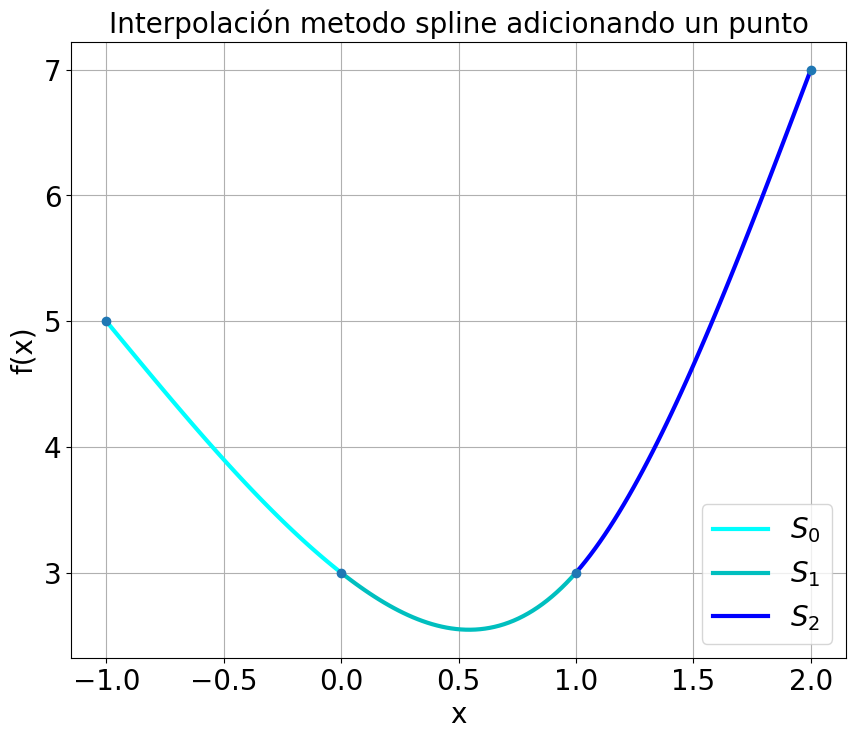

In [ ]:
#Gráfico
xx0 = np.linspace(-1,0)
xx1 = np.linspace(0,1)
xx2 = np.linspace(1,2)

plt.figure(figsize=(10, 8))
plt.plot(xx0, s_0(xx0),"aqua", lw=3, label = "$S_0$")
plt.plot(xx1, s_1(xx1), "c", lw=3, label = "$S_1$")
plt.plot(xx2, s_2(xx2),"b", lw=3, label = "$S_2$")
plt.plot(_x, _y, 'o')
plt.title("Interpolación metodo spline adicionando un punto", fontsize=20)
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "lower right", fontsize= 20)
plt.grid()
plt.show()